In [64]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

Transformations supported in AF already:

1. Rotate
2. Skew - X
3. Skew - Y
4. Translate - X
5. Translate - Y
6. Histogram equalize

(500, 439, 3)


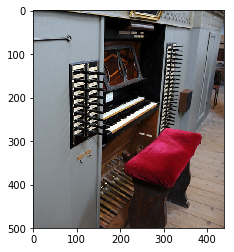

In [65]:
img = imread('/datasets01/imagenet_full_size/061417/test/ILSVRC2012_test_00036355.JPEG')
print(img.shape)
imgplot = plt.imshow(img)
plt.show()

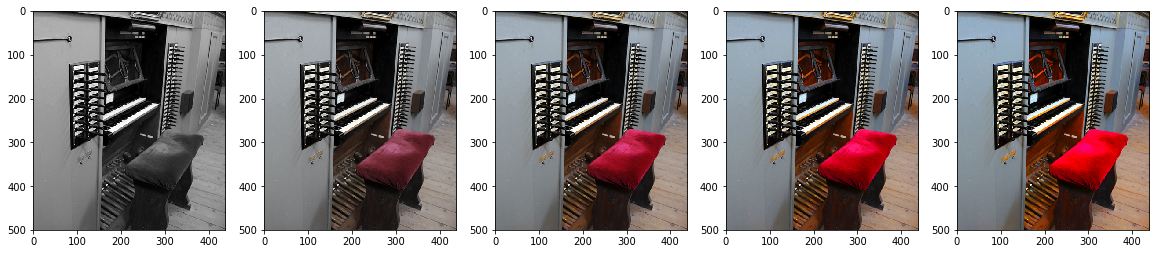

In [66]:
# 7. Color

delta = 2.

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,100))
img_mean = np.tile(img.mean(2).reshape((500,439,1)), (1,1,3)).astype(int)

for i, delta in enumerate([0, 0.5, 1.0, 1.5, 2.0]):
    mix = img_mean + delta * (img - img_mean)
    mix = mix.astype(int)
    mix_clip = np.clip(mix, 0, 255)
    axes[i].imshow(mix_clip)
plt.show()

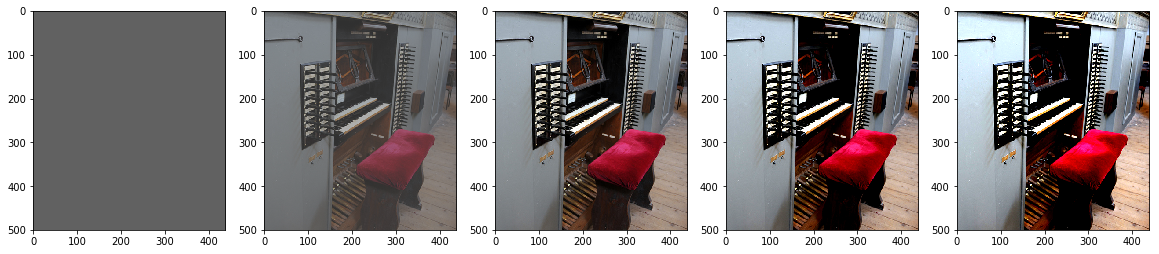

In [78]:
# 8. Contrast

delta = 2.

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,100))

mean = img.mean((0,1,2))
for i, delta in enumerate([0, 0.5, 1.0, 1.5, 2.0]):
    mix = mean + delta * (img.astype(float) - mean)
    mix = mix.astype(int)
    mix_clip = np.clip(mix, 0, 255)
    axes[i].imshow(mix_clip)
plt.show()

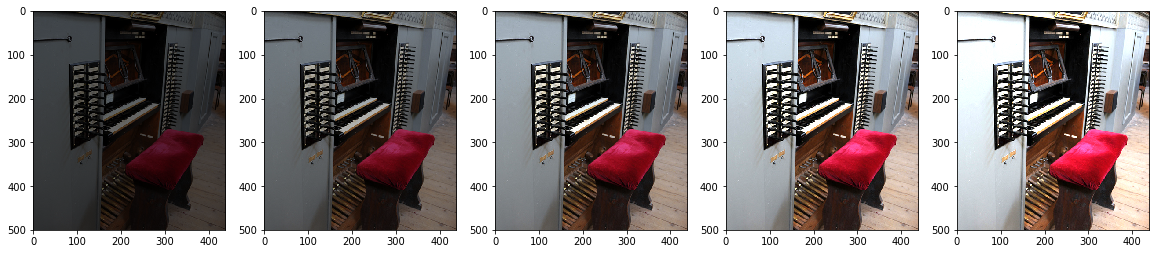

In [68]:
# 9. Brightness 

delta = 2.

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,100))

for i, delta in enumerate([0.4, 0.7, 1.0, 1.3, 1.6]):
    new = img * delta
    new = np.clip(new.astype(int), 0, 255)
    axes[i].imshow(new)
plt.show()

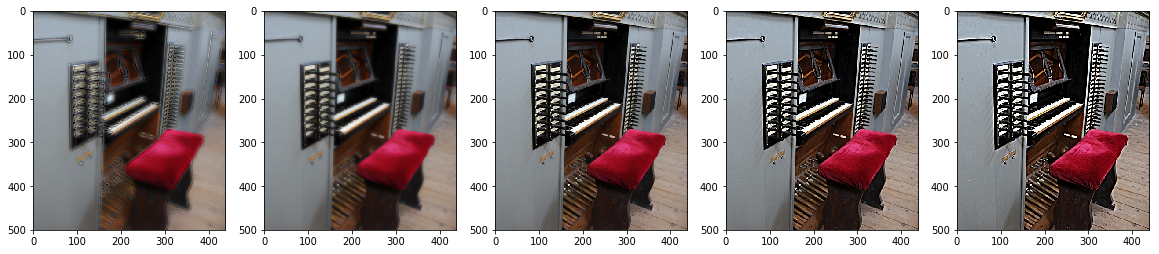

In [74]:
# 10. Sharpness 

from scipy import ndimage

img_mean = np.tile(img.mean(2).reshape((500,439,1)), (1,1,3))
blurred_f = ndimage.gaussian_filter(img_mean, 3).astype(float)


fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,100))
for i, delta in enumerate([-1.5, -0.7, 0.0, 0.7, 1.5]):
    new = img.astype(float) + delta * (img_mean - blurred_f)
    new = np.clip(new.astype(int), 0, 255)
    axes[i].imshow(new)
plt.show()

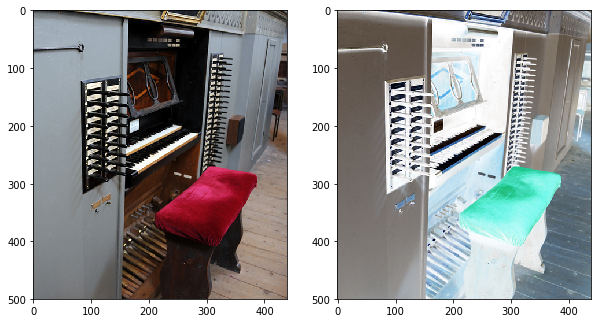

In [70]:
# 11. Invert

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,20))
axes[0].imshow(img)

new = 255 - img
axes[1].imshow(new)
plt.show()

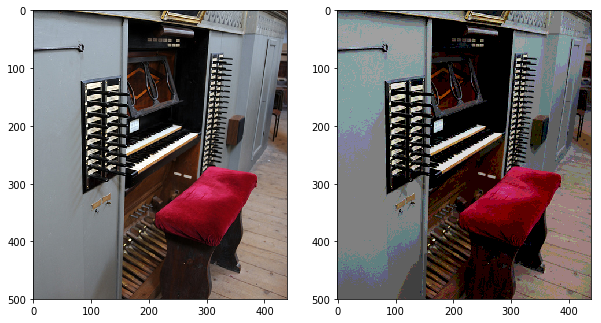

In [71]:
# 12. Posterize

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,20))
axes[0].imshow(img)


mask = ~(2 ** (8 - 3) - 1)

lut = []
for i in range(256):
    lut.append(i & mask)
        
new = img & mask

axes[1].imshow(new)
plt.show()

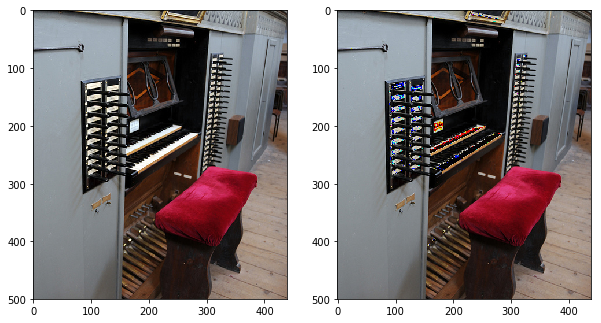

In [72]:
# 13. Solarize

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,20))
axes[0].imshow(img)

mask = img < 230
new = mask * img + (1 - mask) * (255 - img)
axes[1].imshow(new)
plt.show()

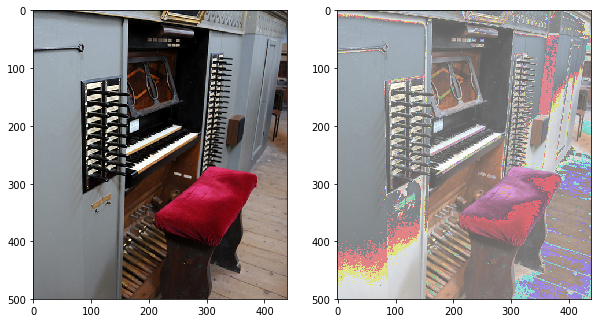

In [73]:
# 14. Soarize add

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,20))
axes[0].imshow(img)

mask = img > 128
new = mask * img + (1 - mask) * (100 + img)
axes[1].imshow(new)
plt.show()

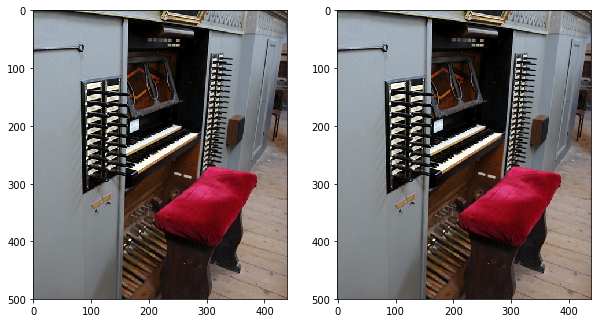

In [87]:
# 15. Auto Contrast

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,20))
axes[0].imshow(img)

minp = img.min()
maxp = img.max()
scale = 256. / (maxp - minp + 1)

new = (img.astype(float) - minp) * scale
new = np.clip(new.astype(int), 0, 255)
axes[1].imshow(new)
plt.show()